## EDA PROJECT

### District/Dataset: Housing in King County, USA
### Client: William Rodriguez

#### (Lukas Kaufmann, 22.09.2023)

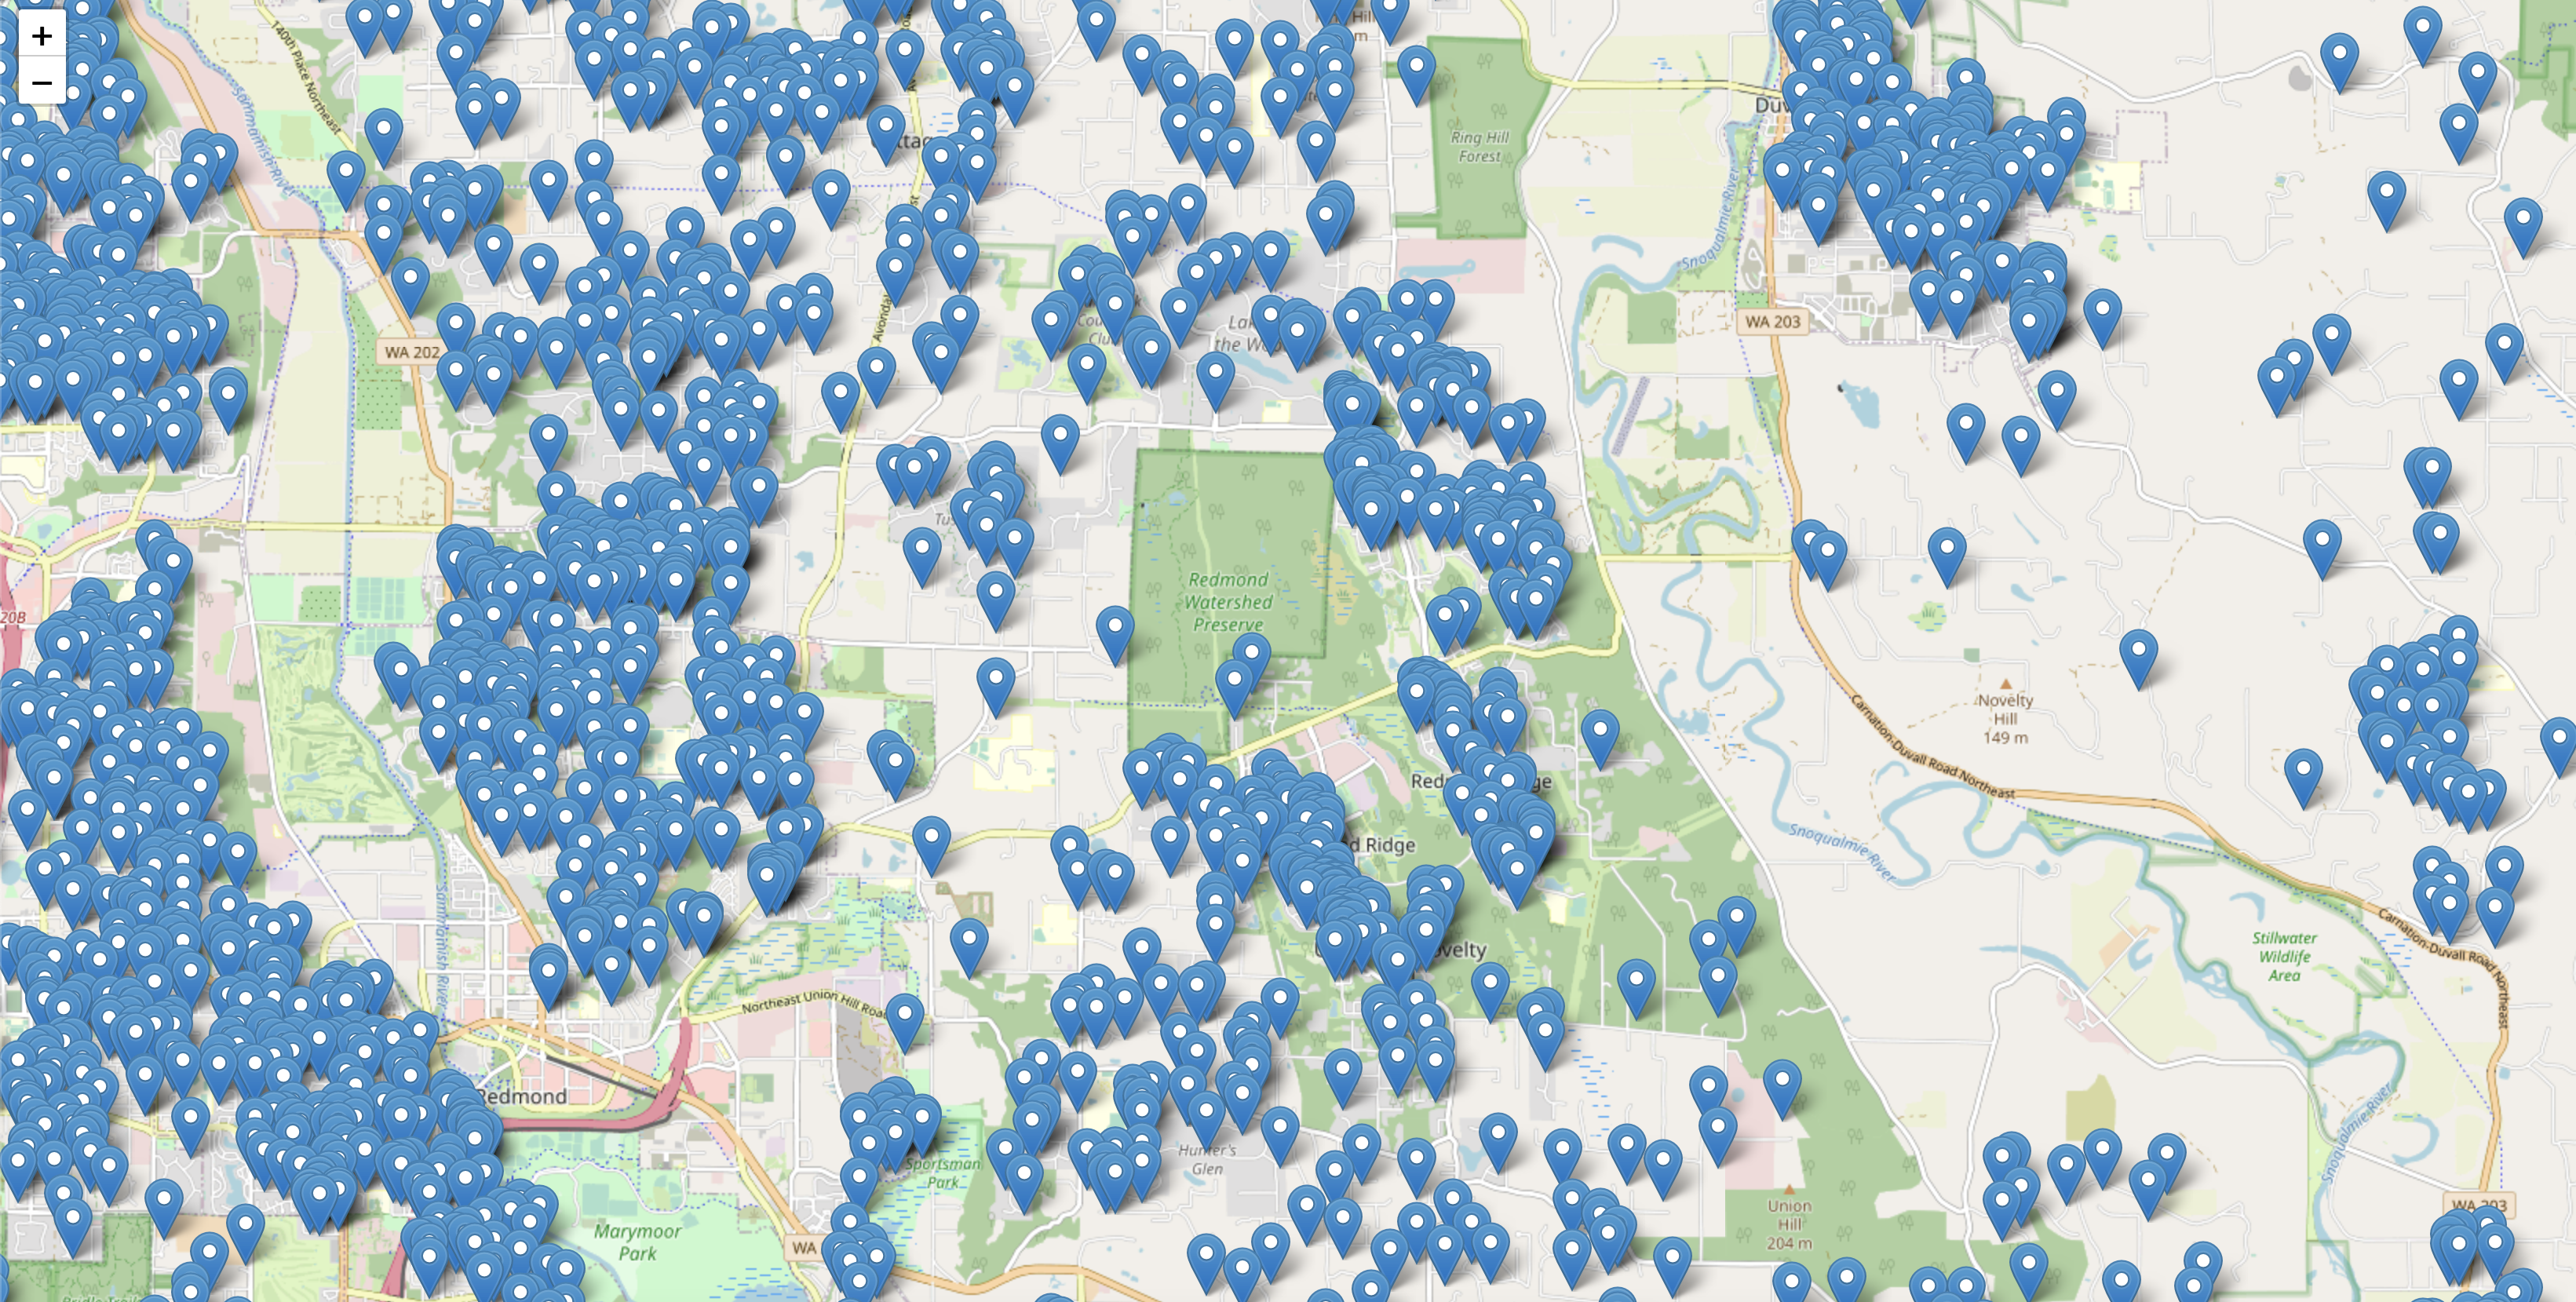

In [1]:
from IPython.display import Image
Image(filename='/Users/lukaskaufmann/Desktop/▲▼/DOKUMENTE/SPICED/_GIT REPOS/ds-eda-project/images/EDA_cover.png')


In [4]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [6]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [7]:
cur = conn.cursor()

In [8]:
query_string = 'SELECT * FROM eda.king_county_house_sales LIMIT 10'
df_psycopg = pd.read_sql(query_string, conn)

In [9]:
df_psycopg.head()

date      price    house_id  id
0  2014-10-13 221900.000  7129300520   1
1  2014-12-09 538000.000  6414100192   2
2  2015-02-25 180000.000  5631500400   3
3  2014-12-09 604000.000  2487200875   4
4  2015-02-18 510000.000  1954400510   5

In [10]:
conn.close()

In [11]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [12]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details kchd LEFT JOIN eda.king_county_house_sales kchs ON kchd.id = kchs.house_id ORDER BY kchd.id"
df_psycopg = pd.read_sql(query_string, conn)

In [13]:
df_psycopg.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
1  1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
2  1200019     4.000      1.750     2060.000 26036.000   1.000         NaN   
3  1200021     3.000      1.000     1460.000 43000.000   1.000       0.000   
4  2800031     3.000      1.000     1430.000  7599.000   1.500       0.000   

   view  condition  grade  ...  yr_renovated  zipcode    lat     long  \
0 0.000          3      7  ...         0.000    98002 47.326 -122.214   
1 0.000          3      7  ...         0.000    98002 47.326 -122.214   
2 0.000          4      8  ...         0.000    98166 47.444 -122.351   
3 0.000          3      7  ...         0.000    98166 47.443 -122.347   
4 0.000          4      6  ...         0.000    98168 47.478 -122.265   

   sqft_living15  sqft_lot15        date      price  house_id    id  
0       2060.000    7316.000  2015-04-22 300000.000   1000102  2496  
1       2060.000    7316.000  2014-09-16 280000.000   1000102  2495  
2       2590.000   21891.000  2014-05-08 647500.000   1200019  6730  
3       2250.000   20023.000  2014-08-11 400000.000   1200021  8405  
4       1290.000   10320.000  2015-04-01 235000.000   2800031  8801  

[5 rows x 23 columns]

In [14]:
#export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',index=False)

In [15]:
#rename and copy data frame
kc_housing = df_psycopg.copy()

### The Dataset is extracted and set up.
<br>

#### I hove chosen the following client / stakeholder / task:

<br>

| William Rodriguez   
| Buyer       
| Two people (want two houses)
| country house (best timing & non-renovated)  
| & city house (fast & central location)

<br>
*added after talk with my clients:
<br>

- the client has a maximum budget of 400.000 $ per house.
- they want to buy two single apartments -> max. 1.5 bathrooms, max. 2 bedrooms, 1100-2000 sqft each.
- no multistory houses or appartments because they want to live accessibly in the future.
- they have a certain living standard, but they want to renovate their country house themselves.
- their city house should be in a good condition.

<br>

---

### Step 0: Research Questions

- what do I want to find out?
 
    -> Generate Hypotheses

<br>


#### Questions:

- When is the best time to buy a (country) house?
- Are the houses in the country side bigger?
- Are the housese in the city more expensive?
- What are the clients needs and wishes? *


#### Hypotheses:

- There is no time of the year where it is “better” to buy a house.
	(price drops within a year or month, etc.)
- House prices in King County generally increase over time.
- The newer the house, the better building grade it has.
	(construction quality / meets code).
- The better rated a house, the more expensive it is.
- The city houses will be smaller but more expensive compared to the country houses.


<br>

---

### Step 1: Data Understanding / Exploring
- Dataframe shape
- head, tail, columns
- dtypes
- describe
- info, etc.

In [16]:
kc_housing.shape

(21597, 23)

In [17]:
kc_housing.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [18]:
kc_housing.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
1  1000102     6.000      3.000     2400.000  9373.000   2.000         NaN   
2  1200019     4.000      1.750     2060.000 26036.000   1.000         NaN   
3  1200021     3.000      1.000     1460.000 43000.000   1.000       0.000   
4  2800031     3.000      1.000     1430.000  7599.000   1.500       0.000   

   view  condition  grade  ...  yr_renovated  zipcode    lat     long  \
0 0.000          3      7  ...         0.000    98002 47.326 -122.214   
1 0.000          3      7  ...         0.000    98002 47.326 -122.214   
2 0.000          4      8  ...         0.000    98166 47.444 -122.351   
3 0.000          3      7  ...         0.000    98166 47.443 -122.347   
4 0.000          4      6  ...         0.000    98168 47.478 -122.265   

   sqft_living15  sqft_lot15        date      price  house_id    id  
0       2060.000    7316.000  2015-04-22 300000.000   1000102  2496  
1       2060.000    7316.000  2014-09-16 280000.000   1000102  2495  
2       2590.000   21891.000  2014-05-08 647500.000   1200019  6730  
3       2250.000   20023.000  2014-08-11 400000.000   1200021  8405  
4       1290.000   10320.000  2015-04-01 235000.000   2800031  8801  

[5 rows x 23 columns]

In [19]:
kc_housing.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

       waterfront      view  condition     grade  ...  yr_built  yr_renovated  \
count   19206.000 21534.000  21597.000 21597.000  ... 21597.000     17749.000   
mean        0.008     0.234      3.410     7.658  ...  1971.000       836.651   
std         0.087     0.766      0.651     1.173  ...    29.375      4000.111   
min         0.000     0.000      1.000     3.000  ...  1900.000         0.000   
25%         0.000     0.000      3.000     7.000  ...  1951.000         0.000   
50%         0.000     0.000      3.000     7.000  ...  1975.000         0.000   
75%         0.000     0.000      4.000     8.000  ...  1997.000         0.000   
max         1.000     4.000      5.000    13.000  ...  2015.000     20150.000   

        zipcode       lat      long  sqft_living15  sqft_lot15       price  \
count 21597.000 21597.000 21597.000      21597.000   21597.000   21597.000   
mean  98077.952    47.560  -122.214       1986.620   12758.284  540296.574   
std      53.513     0.139     0.141        685.230   27274.442  367368.140   
min   98001.000    47.156  -122.519        399.000     651.000   78000.000   
25%   98033.000    47.471  -122.328       1490.000    5100.000  322000.000   
50%   98065.000    47.572  -122.231       1840.000    7620.000  450000.000   
75%   98118.000    47.678  -122.125       2360.000   10083.000  645000.000   
max   98199.000    47.778  -121.315       6210.000  871200.000 7700000.000   

            house_id        id  
count      21597.000 21597.000  
mean  4580474287.771 10799.000  
std   2876735715.748  6234.661  
min      1000102.000     1.000  
25%   2123049175.000  5400.000  
50%   3904930410.000 10799.000  
75%   7308900490.000 16198.000  
max   9900000190.000 21597.000  

[8 rows x 22 columns]

In [20]:
kc_housing.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

---

### Step 2: Data Cleaning 

- remove unneccessary columns from the dataframe
- Identifying duplicated columns and rows
- Renaming columns
- turn integers into date-time-objects
- Check/handle missing values
- Look for and handle possible errors


In [21]:
kch = kc_housing[['id',
                  'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                  'floors', 
                  # 'waterfront', 'view',
                  'condition', 'grade',
                  #'sqft_above', 'sqft_basement',
                  'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                  # 'sqft_living15', 'sqft_lot15',
                  'date', 'price', #'house_id', 'id'
       ]].copy()

In [22]:
kch.columns

Index(['id', 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'date', 'price'],
      dtype='object')

In [23]:
kch.head(10)

id     id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  1000102   2496     6.000      3.000     2400.000  9373.000   2.000   
1  1000102   2495     6.000      3.000     2400.000  9373.000   2.000   
2  1200019   6730     4.000      1.750     2060.000 26036.000   1.000   
3  1200021   8405     3.000      1.000     1460.000 43000.000   1.000   
4  2800031   8801     3.000      1.000     1430.000  7599.000   1.500   
5  3600057   3554     4.000      2.000     1650.000  3504.000   1.000   
6  3600072  18507     4.000      2.750     2220.000  5310.000   1.000   
7  3800008   3198     5.000      1.500     1990.000 18200.000   1.000   
8  5200087  21048     4.000      2.500     2540.000  5001.000   2.000   
9  6200017   4330     3.000      1.000     1340.000 21336.000   1.500   

   condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
0          3      7      1991         0.000    98002 47.326 -122.214   
1          3      7      1991         0.000    98002 47.326 -122.214   
2          4      8      1947         0.000    98166 47.444 -122.351   
3          3      7      1952         0.000    98166 47.443 -122.347   
4          4      6      1930         0.000    98168 47.478 -122.265   
5          3      7      1951     20130.000    98144 47.580 -122.294   
6          5      7      1951           NaN    98144 47.580 -122.294   
7          3      7      1960           NaN    98178 47.494 -122.262   
8          3      9      2005         0.000    98108 47.542 -122.302   
9          4      5      1945         0.000    98032 47.402 -122.273   

         date      price  
0  2015-04-22 300000.000  
1  2014-09-16 280000.000  
2  2014-05-08 647500.000  
3  2014-08-11 400000.000  
4  2015-04-01 235000.000  
5  2015-03-19 402500.000  
6  2015-03-30 680000.000  
7  2015-02-24 178000.000  
8  2014-07-09 487000.000  
9  2014-11-12 281000.000

In [24]:
kch.columns.values[0] = 'house_id'
kch.head()

house_id    id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   1000102  2496     6.000      3.000     2400.000  9373.000   2.000   
1   1000102  2495     6.000      3.000     2400.000  9373.000   2.000   
2   1200019  6730     4.000      1.750     2060.000 26036.000   1.000   
3   1200021  8405     3.000      1.000     1460.000 43000.000   1.000   
4   2800031  8801     3.000      1.000     1430.000  7599.000   1.500   

   condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
0          3      7      1991         0.000    98002 47.326 -122.214   
1          3      7      1991         0.000    98002 47.326 -122.214   
2          4      8      1947         0.000    98166 47.444 -122.351   
3          3      7      1952         0.000    98166 47.443 -122.347   
4          4      6      1930         0.000    98168 47.478 -122.265   

         date      price  
0  2015-04-22 300000.000  
1  2014-09-16 280000.000  
2  2014-05-08 647500.000  
3  2014-08-11 400000.000  
4  2015-04-01 235000.000

In [25]:
kch = kch.drop(kch.columns[1], axis=1)
kch.head()

house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  condition  \
0   1000102     6.000      3.000     2400.000  9373.000   2.000          3   
1   1000102     6.000      3.000     2400.000  9373.000   2.000          3   
2   1200019     4.000      1.750     2060.000 26036.000   1.000          4   
3   1200021     3.000      1.000     1460.000 43000.000   1.000          3   
4   2800031     3.000      1.000     1430.000  7599.000   1.500          4   

   grade  yr_built  yr_renovated  zipcode    lat     long        date  \
0      7      1991         0.000    98002 47.326 -122.214  2015-04-22   
1      7      1991         0.000    98002 47.326 -122.214  2014-09-16   
2      8      1947         0.000    98166 47.444 -122.351  2014-05-08   
3      7      1952         0.000    98166 47.443 -122.347  2014-08-11   
4      6      1930         0.000    98168 47.478 -122.265  2015-04-01   

       price  
0 300000.000  
1 280000.000  
2 647500.000  
3 400000.000  
4 235000.000

In [26]:
kch['date'] = pd.to_datetime(kch['date'])  # Convert 'date' column to datetime
kch['date_year'] = kch['date'].dt.year  # Extract year and add as new column
kch['date_month'] = kch['date'].dt.month  # Extract month and add as new column

In [27]:
kch.dtypes

house_id                 int64
bedrooms               float64
bathrooms              float64
sqft_living            float64
sqft_lot               float64
floors                 float64
condition                int64
grade                    int64
yr_built                 int64
yr_renovated           float64
zipcode                  int64
lat                    float64
long                   float64
date            datetime64[ns]
price                  float64
date_year                int32
date_month               int32
dtype: object

In [28]:
# houses that have been sold more than once
sold_more_than_once = kch.loc[kch.duplicated(subset=['house_id'])]
sold_more_than_once.shape

(177, 17)

In [29]:
#checking if there are duplicated rows
kch.loc[kch.duplicated(subset=['house_id', 'date'])].shape

(0, 17)

<Axes: >

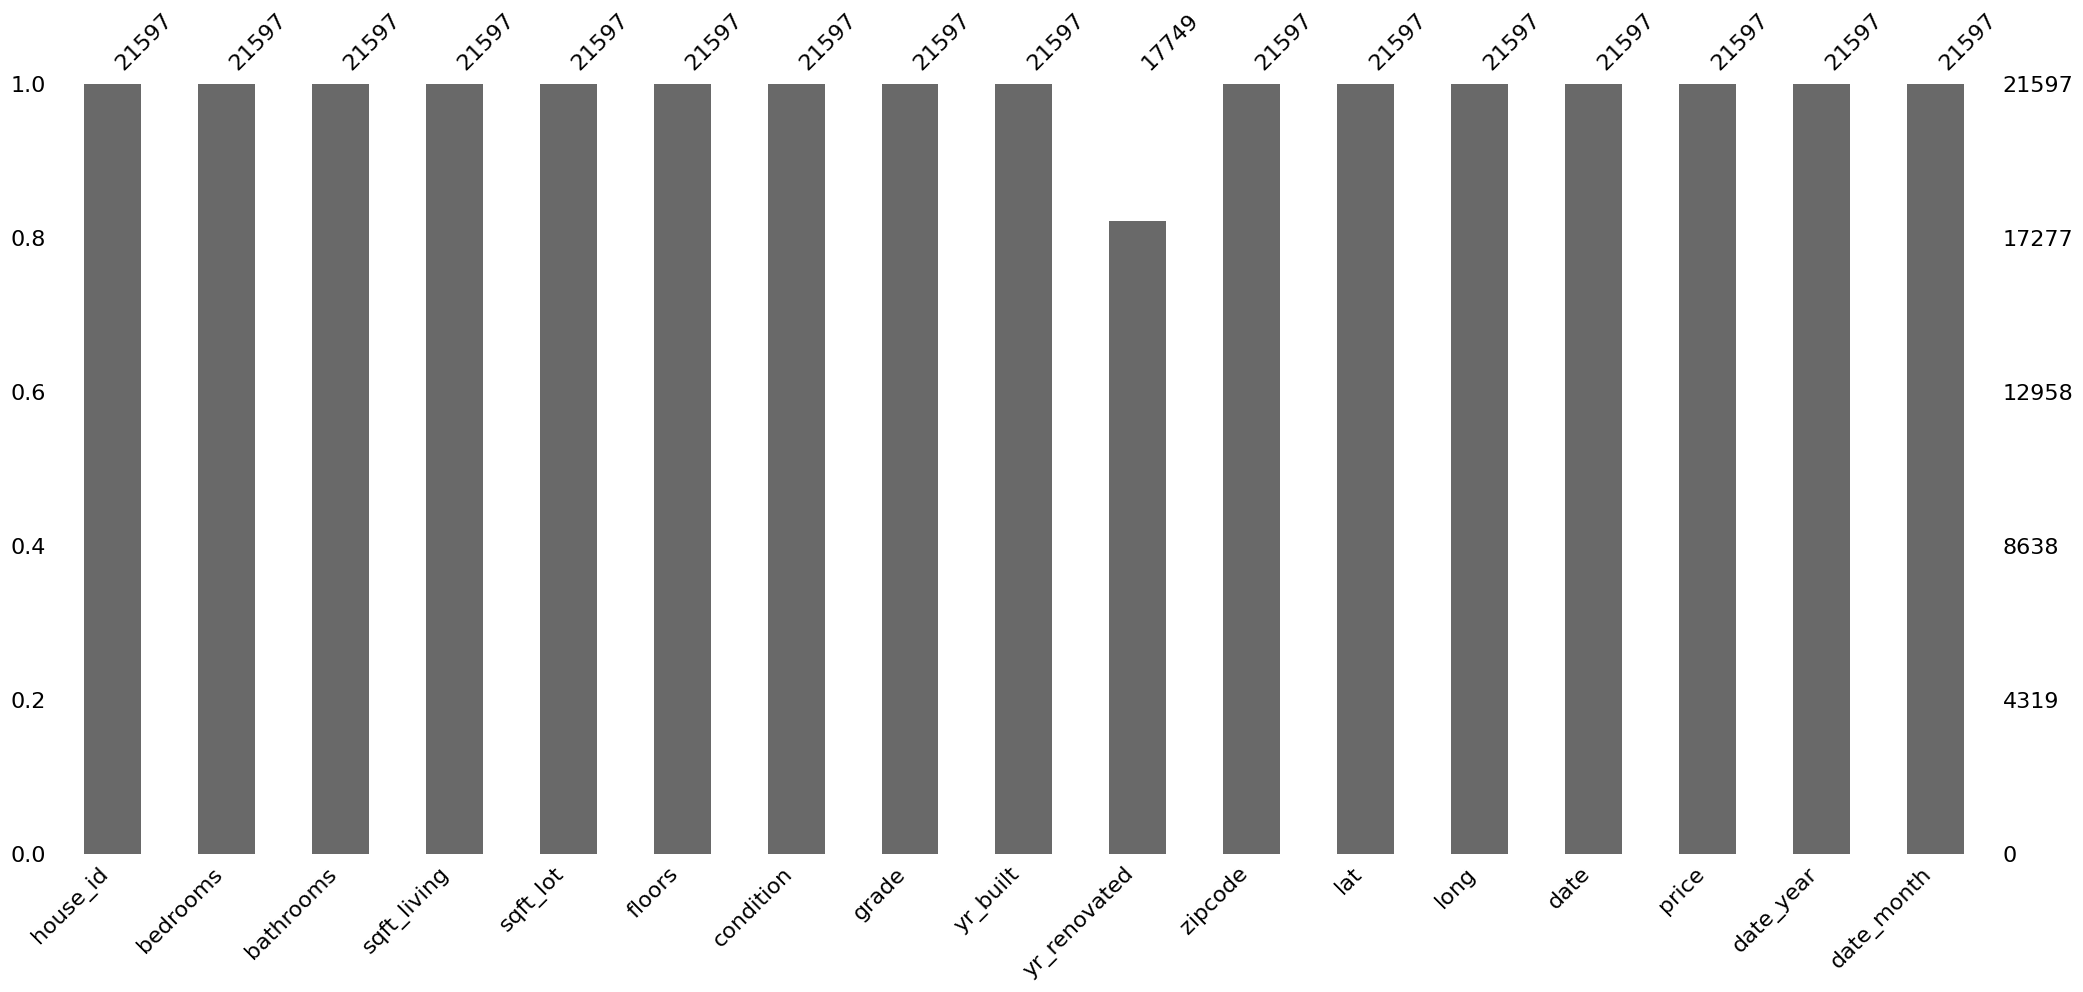

In [30]:
import missingno as msno
msno.bar(kch)

In [31]:
# displays sum of missing values per column
kch.isnull().sum()

house_id           0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
condition          0
grade              0
yr_built           0
yr_renovated    3848
zipcode            0
lat                0
long               0
date               0
price              0
date_year          0
date_month         0
dtype: int64

---

### Step 3: Data Preparation 

- filter houses according to clients needs and wishes
- Make decisions about which houses to recommend to clients

In [32]:
# filter houses for client budget
filter_prize = kch[kch['price'] < 400000]

# filter size according to client needs
filter_size_01 = filter_prize[filter_prize['bedrooms'] <= 2]
filter_size_02 = filter_size_01[(filter_size_01['bathrooms'] >= 1) & (filter_size_01['bathrooms'] <= 1.5)]
filter_size_03 = filter_size_02[(filter_size_02['sqft_living'] >= 1100) & (filter_size_02['sqft_living'] <= 2000)]
filter_size_04 = filter_size_03[filter_size_03['floors'] == 1]

# filter for clients standards and expectations
filter_grade = filter_size_04[filter_size_04['grade'] >= 7 ]


# separating country and city housing options

# country houses
# country house should not be renovated (clients want to do some of the work themselves)
# define country areas

country_zip_codes = [98224, 98288, 98024, 98065, 98045, 98022, 98051, 98019, 98038, 98014, 98029, 98059, 98042, 98092, 98010]

country_house_0 = filter_grade[(filter_grade['yr_renovated'] == 0) | (filter_grade['yr_renovated'].isna())]
country_house_1 = country_house_0[(country_house_0['condition'] > 2) & (country_house_0['condition'] < 4)]
country_house = country_house_1[country_house_1['zipcode'].isin(country_zip_codes)]
                                

# city houses
# should be in good condition
# define city areas

city_house_0 = filter_grade[filter_grade['condition'] == 5]
city_house = city_house_0[~city_house_0['zipcode'].isin(country_zip_codes)]


# create sublists with all city and country houses

all_city_houses = kch[~kch['zipcode'].isin(country_zip_codes)]
all_country_houses = kch[kch['zipcode'].isin(country_zip_codes)]



In [33]:
country_house.shape

(3, 17)

In [34]:
city_house.shape

(3, 17)

In [35]:
print(city_house.head(15))

         house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
10029  3649100320     2.000      1.000     1220.000 10000.000   1.000   
14014  6082400260     2.000      1.000     1200.000  9488.000   1.000   
17267  7809200035     2.000      1.000     1250.000 12507.000   1.000   

       condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
10029          5      7      1950         0.000    98028 47.740 -122.241   
14014          5      7      1941         0.000    98168 47.483 -122.299   
17267          5      7      1958         0.000    98056 47.497 -122.176   

            date      price  date_year  date_month  
10029 2015-04-30 330000.000       2015           4  
14014 2014-11-12 231500.000       2014          11  
17267 2015-01-23 290000.000       2015           1  


In [36]:
print(country_house.head(15))

         house_id  bedrooms  bathrooms  sqft_living   sqft_lot  floors  \
242     123079023     2.000      1.000     1430.000 365904.000   1.000   
11292  4047200265     2.000      1.000     1100.000  17817.000   1.000   
18833  8570900328     2.000      1.000     1170.000  10621.000   1.000   

       condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
242            3      7      1991         0.000    98065 47.513 -121.857   
11292          3      7      1980         0.000    98019 47.773 -121.900   
18833          3      7      1963         0.000    98045 47.497 -121.780   

            date      price  date_year  date_month  
242   2014-11-24 356000.000       2014          11  
11292 2014-08-11 325000.000       2014           8  
18833 2014-06-03 295000.000       2014           6  


In [37]:
city_house['zipcode'].unique()

array([98028, 98168, 98056])

In [38]:
country_house['zipcode'].unique()

array([98065, 98019, 98045])

---

### Step 4: Feature Understanding & Relationships - Data Visualisation

- Map locations
- Boxplots
- Scatterplots
- Heatmap
- Pairplots
- (Multi-)Lineplots
- Compare Top Houses 

In [39]:
### This code is not used in the final visualisation, it is just here for documentation purposes ###

dfmap = country_house[['price', 'zipcode', 'lat', 'long']]
dfmap.head()

price  zipcode    lat     long
242   356000.000    98065 47.513 -121.857
11292 325000.000    98019 47.773 -121.900
18833 295000.000    98045 47.497 -121.780

In [40]:
### This code is not used in the final visualisation, it is just here for documentation purposes ###

#Create the dataframe containing the data we want.
dfmap.zipcode = dfmap.zipcode.astype(int)
zipcode_means = []
for i in dfmap.zipcode.unique().tolist():
    val = dfmap[dfmap['zipcode'] == i]['price'].mean()
    lat = dfmap[dfmap['zipcode'] == i]['lat'].mean()
    long = dfmap[dfmap['zipcode'] == i]['long'].mean()
    zipcode_means.append([str(i), val, lat, long])
xall = []
yall = []
latall = []
longall = []
for val in zipcode_means:
    xall.append(val[0])
    yall.append(val[1])
    latall.append(val[2])
    longall.append(val[3])
kch_zip = pd.DataFrame(list(zip(xall, yall, latall, longall)), columns = ['zipcode', 'price', 'lat', 'long'])

In [41]:
### This code is not used in the final visualisation, it is just here for documentation purposes ###

import folium
map = folium.Map(location=[47.5112, -122.257], default_zoom_start=15)

In [42]:
### This code is not used in the final visualisation, it is just here for documentation purposes ###

map.choropleth(geo_data="data/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.geojson",
               data=kch_zip, 
               columns=['zipcode', 'price'], #filter and add house_id 
               key_on='feature.properties.ZIPCODE', 
               fill_color='BuPu',fill_opacity=0.7,line_opacity=0.2,
               legend_name='SALE PRICE')

In [43]:
### This code is not used in the final visualisation, it is just here for documentation purposes ###

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map) # create marker clusters
for i in range((kch_zip.shape[0])):
    location = [kch_zip['lat'][i], kch_zip['long'][i]]
    tooltip = "zipcode: {}".format(kch_zip["zipcode"][i])
    folium.Marker(location, 
                  popup="""
                  <i>Mean sales price: </i> <br> <b>${}</b> 
                  """.format(round(kch_zip['price'][i],2)),
                  tooltip=tooltip).add_to(marker_cluster)

In [44]:
# mapping locations for top country houses

# Create a map centered around a location (e.g., Seattle)
country_house_map = folium.Map(location=[47.513, -121.857], zoom_start=9)

# Add markers for each house location
for index, row in country_house.iterrows():
    folium.Marker([row['lat'], row['long']], popup=row['house_id']).add_to(country_house_map)

# Save the map to an HTML file or display it in a Jupyter Notebook
# country_house_map.save('country_house_locations.html')

from IPython.display import display
display(country_house_map)

In [45]:
# mapping locations for top city houses

# Create a map centered around a location (e.g., Seattle)
city_house_map = folium.Map(location=[47.513, -121.857], zoom_start=9)

# Add markers for each house location
for index, row in city_house.iterrows():
    folium.Marker([row['lat'], row['long']], popup=row['house_id']).add_to(city_house_map)

# Save the map to an HTML file or display it in a Jupyter Notebook
# city_house_map.save('city_house_locations.html')

display(city_house_map)

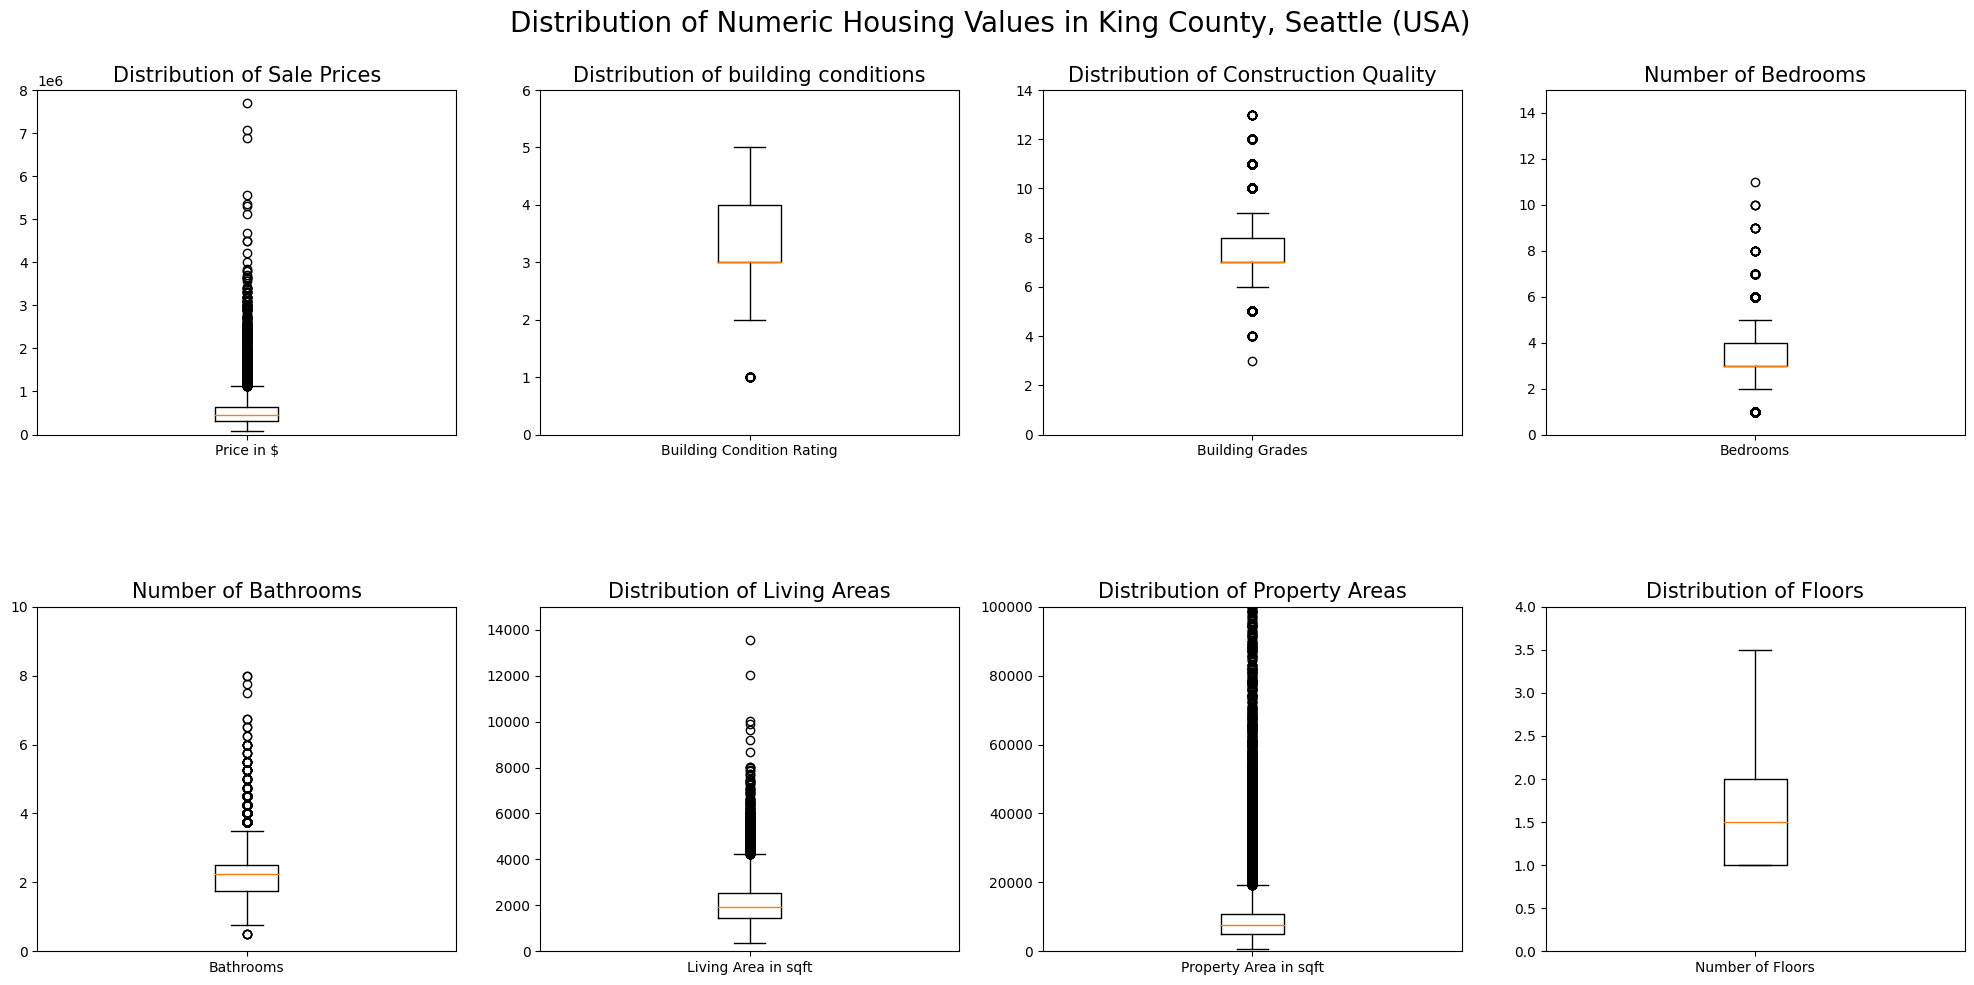

In [46]:
# BOXPLOTS

fig, ax = plt.subplots(2,4, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of Numeric Housing Values in King County, Seattle (USA)', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
plt.ticklabel_format(style='plain', axis='y')

ax[0][0].boxplot(x = kch['price']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["Price in $"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,8000000) # limits the y-axis values from 0 to 400000 
ax[0][0].set_title("Distribution of Sale Prices", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = kch['condition'])
ax[0][1].set_xticklabels(labels=["Building Condition Rating"])
ax[0][1].set_ylim(0,6)
ax[0][1].set_title("Distribution of building conditions", fontsize = 15);

ax[0][2].boxplot(x = kch['grade'])
ax[0][2].set_xticklabels(labels=["Building Grades"])
ax[0][2].set_ylim(0,14)
ax[0][2].set_title("Distribution of Construction Quality", fontsize = 15);

ax[0][3].boxplot(x = kch['bedrooms'])
ax[0][3].set_xticklabels(labels=["Bedrooms"])
ax[0][3].set_ylim(0,15)
ax[0][3].set_title("Number of Bedrooms", fontsize = 15);

ax[1][0].boxplot(x = kch['bathrooms'])
ax[1][0].set_xticklabels(labels=["Bathrooms"])
ax[1][0].set_ylim(0,10)
ax[1][0].set_title("Number of Bathrooms", fontsize = 15);
                              
ax[1][1].boxplot(x = kch['sqft_living'])
ax[1][1].set_xticklabels(labels=["Living Area in sqft"])
ax[1][1].set_ylim(0,15000)
ax[1][1].set_title("Distribution of Living Areas", fontsize = 15);

ax[1][2].boxplot(x = kch['sqft_lot'])
ax[1][2].set_xticklabels(labels=["Property Area in sqft"])
ax[1][2].set_ylim(0,100000)
ax[1][2].set_title("Distribution of Property Areas", fontsize = 15);

ax[1][3].boxplot(x = kch['floors'])
ax[1][3].set_xticklabels(labels=["Number of Floors"])
ax[1][3].set_ylim(0,4)
ax[1][3].set_title("Distribution of Floors", fontsize = 15);

In [47]:
# preparing correlations for HEATMAP

kch_corr = kch[['sqft_living', 'sqft_lot',
       'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'price', 'date_year', 'date_month']].dropna().corr()

kch_corr

sqft_living  sqft_lot  condition  grade  yr_built  yr_renovated  \
sqft_living         1.000     0.168     -0.065  0.764     0.315         0.056   
sqft_lot            0.168     1.000     -0.010  0.109     0.049         0.004   
condition          -0.065    -0.010      1.000 -0.151    -0.367        -0.062   
grade               0.764     0.109     -0.151  1.000     0.445         0.016   
yr_built            0.315     0.049     -0.367  0.445     1.000        -0.225   
yr_renovated        0.056     0.004     -0.062  0.016    -0.225         1.000   
zipcode            -0.201    -0.130      0.006 -0.185    -0.345         0.070   
price               0.703     0.086      0.033  0.664     0.050         0.129   
date_year          -0.027     0.002     -0.045 -0.031     0.004        -0.022   
date_month          0.011     0.002      0.020  0.010    -0.008         0.009   

              zipcode  price  date_year  date_month  
sqft_living    -0.201  0.703     -0.027       0.011  
sqft_lot       -0.130  0.086      0.002       0.002  
condition       0.006  0.033     -0.045       0.020  
grade          -0.185  0.664     -0.031       0.010  
yr_built       -0.345  0.050      0.004      -0.008  
yr_renovated    0.070  0.129     -0.022       0.009  
zipcode         1.000 -0.052      0.005      -0.001  
price          -0.052  1.000      0.003      -0.008  
date_year       0.005  0.003      1.000      -0.783  
date_month     -0.001 -0.008     -0.783       1.000

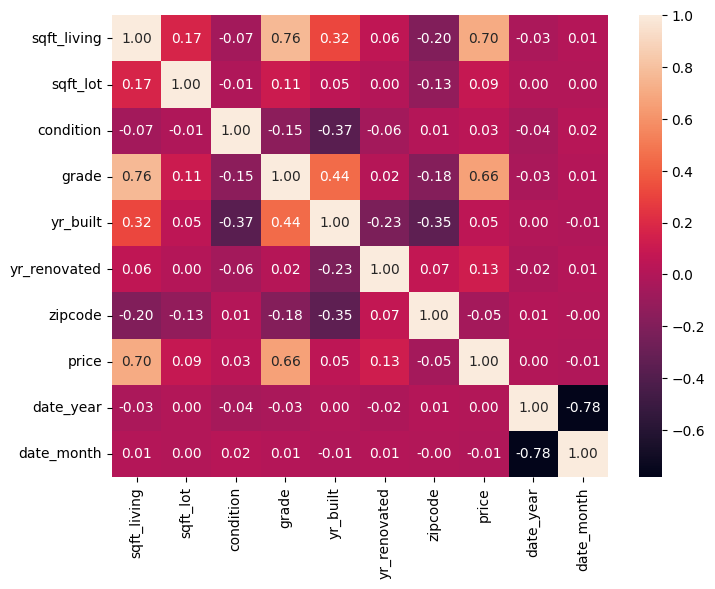

In [48]:
# HEATMAP

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(kch_corr, annot=True, fmt=".2f")  # Use fmt=".2f" to round to two decimal places
plt.show()

##### 1. grade and sqft_living have a high correlation to the price of the house.
##### 2. year_built has an effect on the grade and to sqft_living.
##### 3. grade and sqft_living are related to each other as well.

<Figure size 800x600 with 0 Axes>

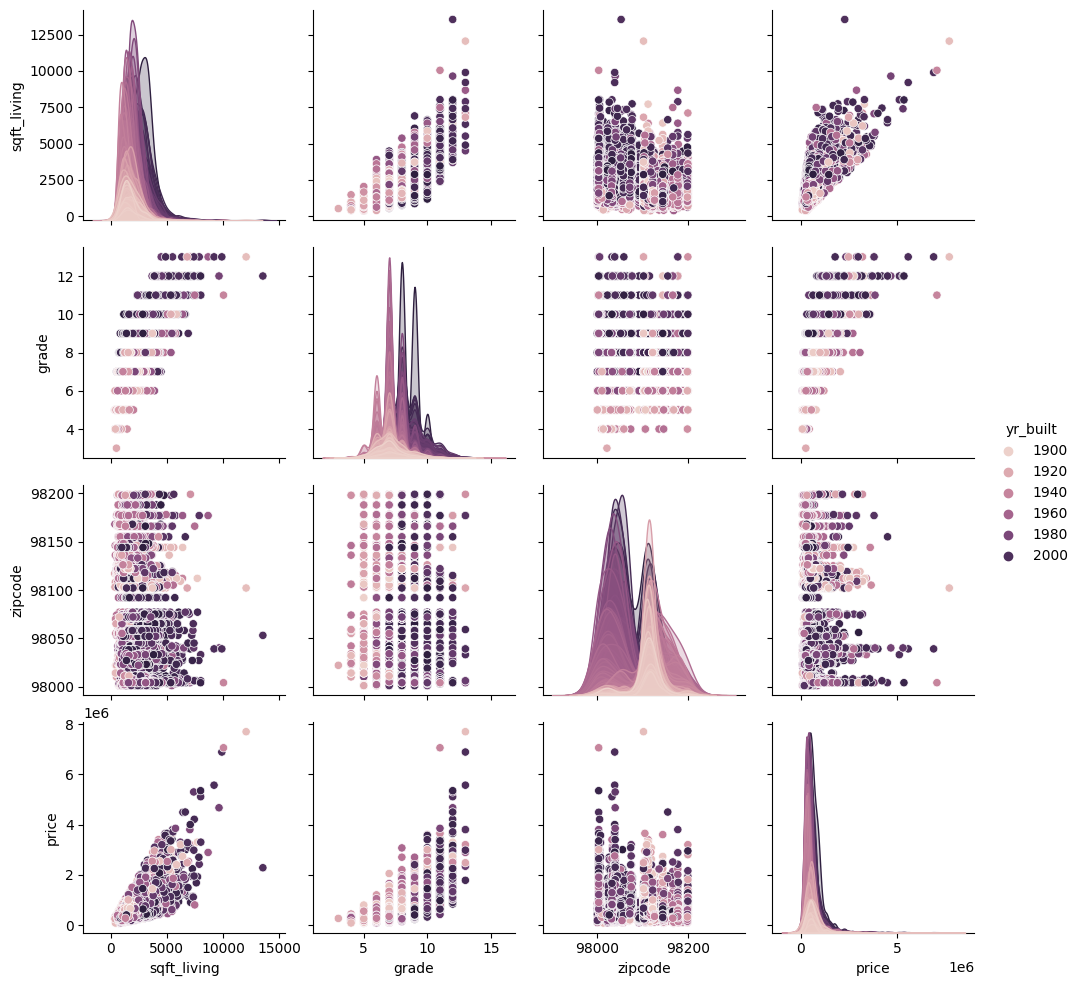

In [49]:
# PAIRPLOT

plt.figure(figsize=(8, 6)) 
sns.pairplot(kch,
             vars=['sqft_living', 'grade', 'zipcode', 'price'],
            hue='yr_built')
plt.show()

##### 1. older houses are smaller in size.
##### 2. newer houses have better grades.
##### 3. The better rated and the bigger a house, the more expensive it is.
##### 4. The pricerange is rather evenly distributed throughout the zipcodes.
##### *5. Is the time of the sale related to the price of the house?*

---

### Step 5: Answer questions about the data

- When is the best time to buy the country house?
- Are country houses bigger than city houses?
- Are city houses more expensive compared to country houses?
- Show top three country and city houses
- Insights and recommendations for client

In [50]:
# distribution of sales per month
month_counts = kch['date_month'].value_counts()
print(month_counts)

date_month
5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: count, dtype: int64


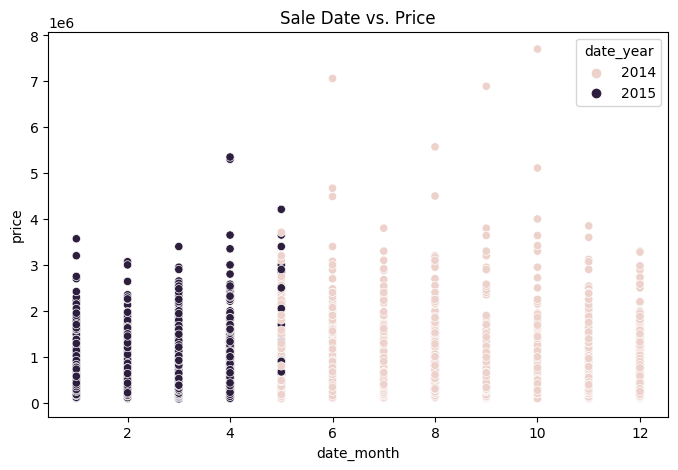

In [51]:
# distribution of sales per month (all houses)

ax = sns.scatterplot(x='date_month',
                y='price',
                hue='date_year',
                data=kch)
ax.set_title('Sale Date vs. Price')
plt.show()

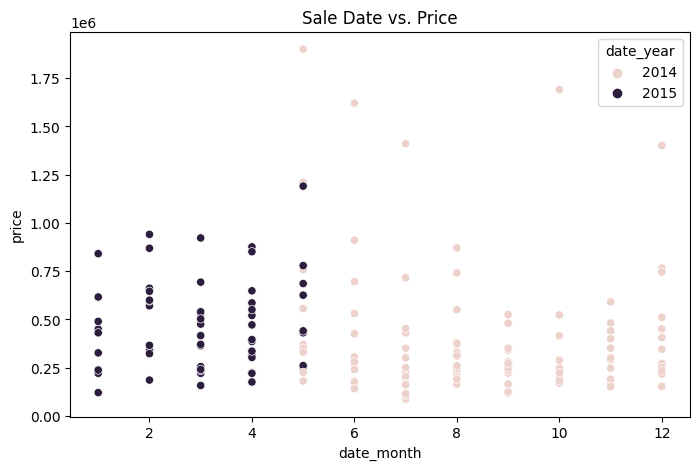

In [52]:
# distribution of sales per month (for houses that have been sold more than once) 

ax = sns.scatterplot(x='date_month',
                y='price',
                hue='date_year',
                data=sold_more_than_once)
ax.set_title('Sale Date vs. Price')
plt.show()

# relation between / development of individual housing prices is missing
# -> include house_id's

In [53]:
# Find the 'house_id' values that have duplicates
duplicate_house_ids = kch[kch.duplicated(subset='house_id', keep=False)]['house_id']

# Filter the original DataFrame to include all sales data for these houses
sold_several_times = kch[kch['house_id'].isin(duplicate_house_ids)]

# Now, 'sold_several_times' contains all sales data for the houses sold more than once
sold_several_times

house_id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0         1000102     6.000      3.000     2400.000  9373.000   2.000   
1         1000102     6.000      3.000     2400.000  9373.000   2.000   
11        7200179     2.000      1.000      840.000 12750.000   1.000   
12        7200179     2.000      1.000      840.000 12750.000   1.000   
174     109200390     3.000      1.750     1480.000  3900.000   1.000   
...           ...       ...        ...          ...       ...     ...   
21472  9828200460     2.000      1.000      700.000  4800.000   1.000   
21558  9834200305     3.000      1.000     1790.000  3876.000   1.500   
21559  9834200305     3.000      1.000     1790.000  3876.000   1.500   
21565  9834200885     4.000      2.500     2080.000  4080.000   1.000   
21566  9834200885     4.000      2.500     2080.000  4080.000   1.000   

       condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
0              3      7      1991         0.000    98002 47.326 -122.214   
1              3      7      1991         0.000    98002 47.326 -122.214   
11             3      6      1925           NaN    98055 47.484 -122.211   
12             3      6      1925           NaN    98055 47.484 -122.211   
174            4      7      1980         0.000    98023 47.298 -122.367   
...          ...    ...       ...           ...      ...    ...      ...   
21472          3      7      1922         0.000    98122 47.615 -122.300   
21558          5      7      1904         0.000    98144 47.575 -122.288   
21559          5      7      1904         0.000    98144 47.575 -122.288   
21565          5      7      1962         0.000    98144 47.572 -122.290   
21566          5      7      1962         0.000    98144 47.572 -122.290   

            date      price  date_year  date_month  
0     2015-04-22 300000.000       2015           4  
1     2014-09-16 280000.000       2014           9  
11    2014-10-16 150000.000       2014          10  
12    2015-04-24 175000.000       2015           4  
174   2014-08-20 245000.000       2014           8  
...          ...        ...        ...         ...  
21472 2015-01-06 430000.000       2015           1  
21558 2015-02-10 615000.000       2015           2  
21559 2014-07-16 350000.000       2014           7  
21565 2014-07-17 360000.000       2014           7  
21566 2015-04-20 550000.000       2015           4  

[353 rows x 17 columns]

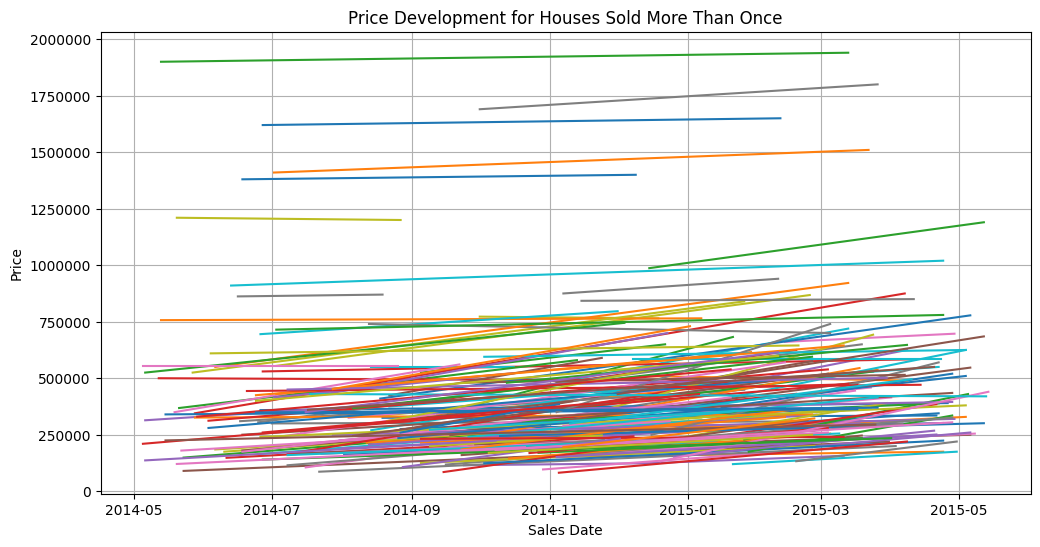

In [54]:
# LINEPLOTS

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6), alpha=0.5)

# Iterate through unique house_ids
for house_id in sold_several_times['house_id'].unique():
    house_data = sold_several_times[sold_several_times['house_id'] == house_id]
    
    # Sort the data by date to ensure the line is continuous
    house_data = house_data.sort_values('date')
    
    # Plot the price against date_month for each house_id
    ax.plot(house_data['date'], house_data['price'])

# Set labels and title
ax.set_xlabel('Sales Date')
ax.set_ylabel('Price')
ax.set_title('Price Development for Houses Sold More Than Once')

plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.grid(True)
plt.show()


##### Prices increase, as expected.

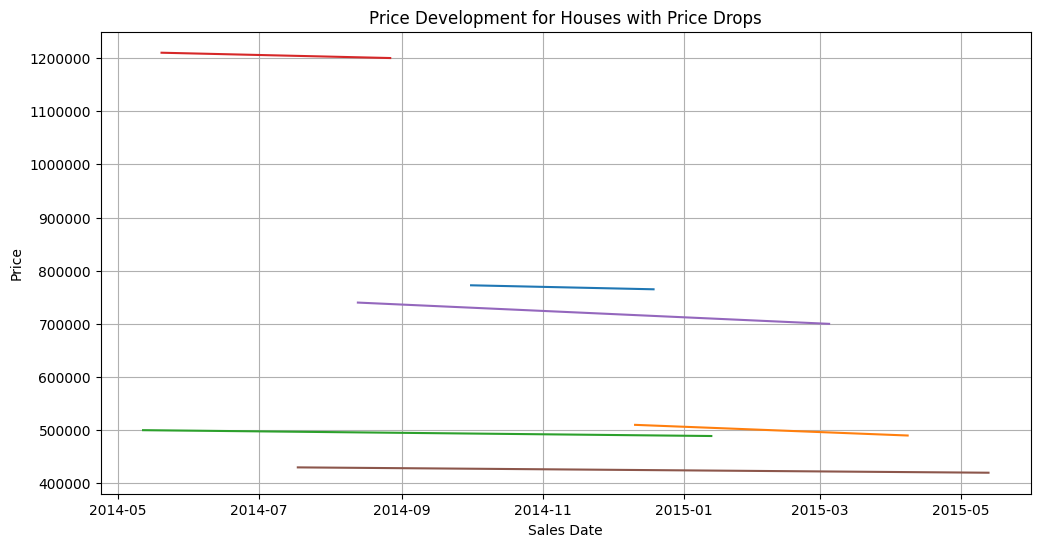

House IDs with Price Drops: [2619920170, 2726049071, 2767603612, 4139420590, 7167000040, 8682262400]


In [55]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize a list to store house IDs with price drops
house_ids_with_price_drop = []

# Iterate through unique house_ids
for house_id in sold_several_times['house_id'].unique():
    house_data = sold_several_times[sold_several_times['house_id'] == house_id]
    
    # Sort the data by date to ensure the line is continuous
    house_data = house_data.sort_values('date')
    
    # Check if the price dropped after the first sale
    initial_price = house_data['price'].iloc[0]
    final_price = house_data['price'].iloc[-1]
    
    # Plot the price against date_month for houses with a price drop
    if final_price < initial_price:
        ax.plot(house_data['date'], house_data['price'])
        house_ids_with_price_drop.append(house_id)

# Set labels and title
ax.set_xlabel('Sales Date')
ax.set_ylabel('Price')
ax.set_title('Price Development for Houses with Price Drops')

plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.grid(True)
plt.show()

# Print the house IDs with price drops
print("House IDs with Price Drops:", house_ids_with_price_drop)


##### Shows houses were prices have dropped -> outliers! (3.4 %) (6 out of 176 houses)

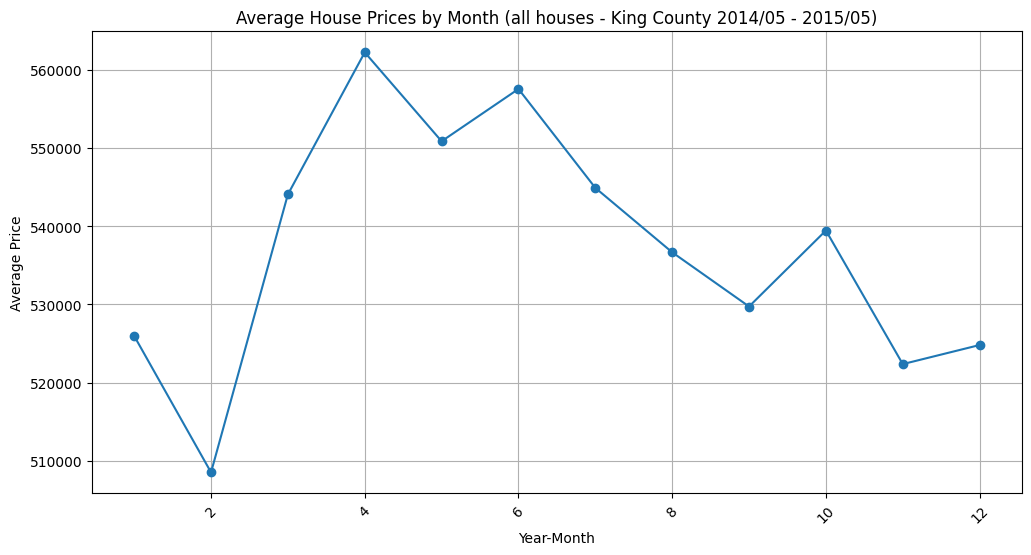

In [56]:
# Group by year and month, calculate the average price for each month
monthly_avg_price = kch.groupby('date_month')['price'].mean()

# Create a line plot to visualize the average prices by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-')
plt.title('Average House Prices by Month (all houses - King County 2014/05 - 2015/05)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()


#### Shows average House prices by month (for all houses that have been sold in King County between May 2014 and May 2015)
<br>

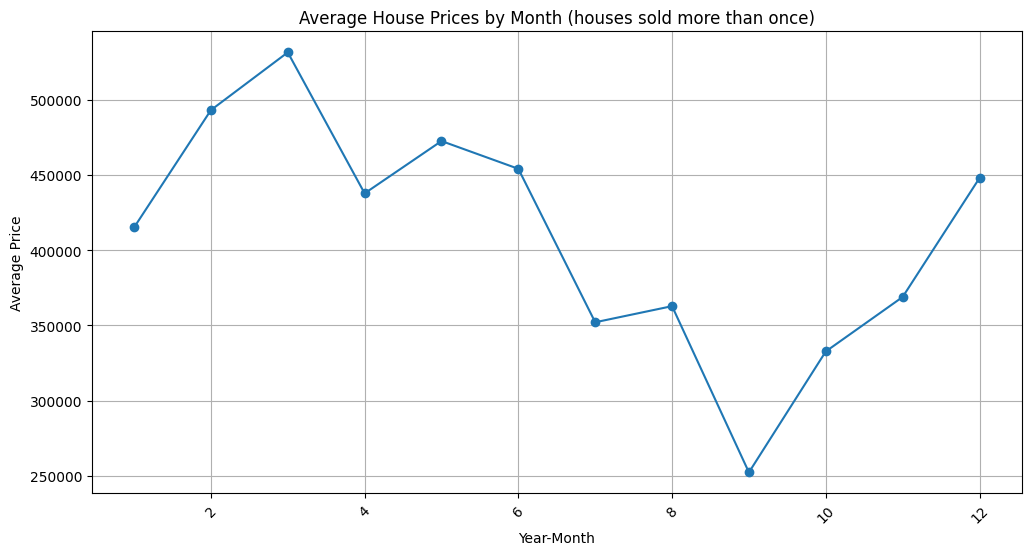

In [57]:
# Group by year and month, calculate the average price for each month
monthly_avg_price = sold_several_times.groupby('date_month')['price'].mean()

# Create a line plot to visualize the average prices by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-')
plt.title('Average House Prices by Month (houses sold more than once)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()


#### Shows average House prices by month (for houses that have been sold more than once)
<br>

#### Conclusion:

Analyzing the "best time" to buy a house based solely on the month is challenging for several reasons:
- real estate prices are influenced by a multitude of factors:

    (including market conditions, economic factors, location, and individual property attributes.)

- No Long-Term Trends available:

    (Real estate trends often follow long-term cycles.)

    <br>

#### Recommendation:
    
- The best time to buy a house depends on individual circumstances and goals

- The sooner the better, since housing prices tend to increase

In [58]:
# comparing overall city and country house values

city_mean_price = all_city_houses['price'].mean()
country_mean_price = all_country_houses['price'].mean()

city_mean_size_lv = all_city_houses['sqft_living'].mean()
country_mean_size_lv = all_country_houses['sqft_living'].mean()

city_mean_size_lt = all_city_houses['sqft_lot'].mean()
country_mean_size_lt = all_country_houses['sqft_lot'].mean()


print("Average Price of City Houses:", city_mean_price)
print("Average Price of Country Houses:", country_mean_price)
print("Average Living Area Size of City Houses:", city_mean_size_lv)
print("Average Living Area Size of Country Houses:", country_mean_size_lv)
print("Average Property Area Size of City Houses:", city_mean_size_lt)
print("Average Property Area Size of Country Houses:", country_mean_size_lt)

Average Price of City Houses: 563304.3175578435
Average Price of Country Houses: 422579.8065703767
Average Living Area Size of City Houses: 2058.8280194841136
Average Living Area Size of Country Houses: 2190.292834890966
Average Property Area Size of City Houses: 11781.757444924167
Average Property Area Size of Country Houses: 32073.832058906824


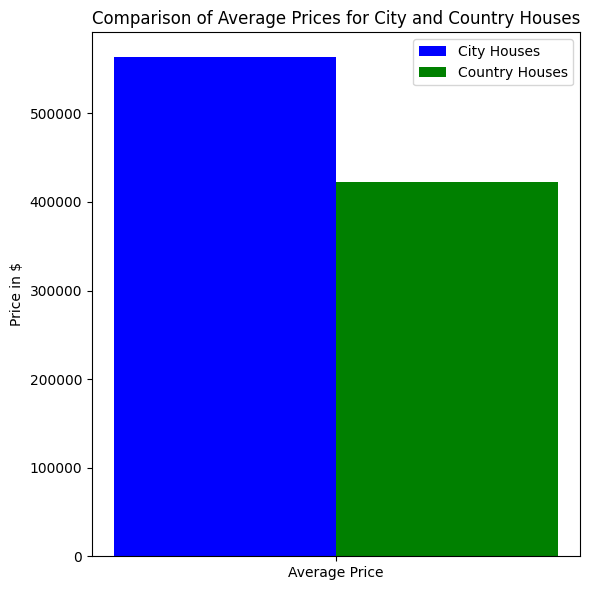

In [59]:
# BAR CHART - price

categories = ['Average Price']
city_values = [city_mean_price]
country_values = [country_mean_price]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Define bar width
bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for average prices
city_bars = ax.bar(index - bar_width/2, city_values, bar_width, label='City Houses', color='b')
country_bars = ax.bar(index + bar_width/2, country_values, bar_width, label='Country Houses', color='g')

# Set x-axis ticks
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Set y-axis label
ax.set_ylabel('Price in $')

# Title
plt.title('Comparison of Average Prices for City and Country Houses')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


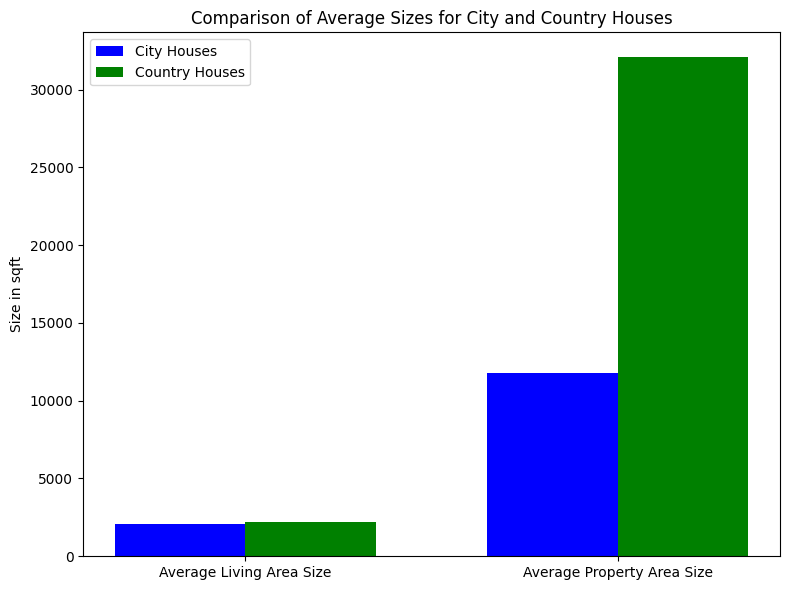

In [60]:
# BAR CHART - size

categories = ['Average Living Area Size', 'Average Property Area Size']
city_values = [city_mean_size_lv, city_mean_size_lt]
country_values = [country_mean_size_lv, country_mean_size_lt]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.35
index = np.arange(len(categories))

# Plot the bars for average sizes
city_bars = ax.bar(index - bar_width/2, city_values, bar_width, label='City Houses', color='b')
country_bars = ax.bar(index + bar_width/2, country_values, bar_width, label='Country Houses', color='g')

# Set x-axis ticks
ax.set_xticks(index)
ax.set_xticklabels(categories)

# Set y-axis label
ax.set_ylabel('Size in sqft')

# Title
plt.title('Comparison of Average Sizes for City and Country Houses')

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [61]:
# merge country and city houses in one final list

# add new values to give them names
top_3_city = ['City_House_A', 'City_House_B', 'City_House_C']
top_3_country = ['Country_House_A', 'Country_House_B', 'Country_House_C']

# add new column in both lists
city_house['Top_3'] = top_3_city
country_house['Top_3'] = top_3_country

# merge lists
top_houses = pd.concat([city_house, country_house], axis=0)
top_houses = top_houses.reset_index(drop=True)

print(top_houses)


     house_id  bedrooms  bathrooms  sqft_living   sqft_lot  floors  condition  \
0  3649100320     2.000      1.000     1220.000  10000.000   1.000          5   
1  6082400260     2.000      1.000     1200.000   9488.000   1.000          5   
2  7809200035     2.000      1.000     1250.000  12507.000   1.000          5   
3   123079023     2.000      1.000     1430.000 365904.000   1.000          3   
4  4047200265     2.000      1.000     1100.000  17817.000   1.000          3   
5  8570900328     2.000      1.000     1170.000  10621.000   1.000          3   

   grade  yr_built  yr_renovated  zipcode    lat     long       date  \
0      7      1950         0.000    98028 47.740 -122.241 2015-04-30   
1      7      1941         0.000    98168 47.483 -122.299 2014-11-12   
2      7      1958         0.000    98056 47.497 -122.176 2015-01-23   
3      7      1991         0.000    98065 47.513 -121.857 2014-11-24   
4      7      1980         0.000    98019 47.773 -121.900 2014-08-11   


In [62]:
# drop unwanted columns
top_houses_final = top_houses[['Top_3', 'price' , 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade', 'yr_built', 'zipcode']].copy()

# final list
top_houses_final.head(6)

Top_3      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
0     City_House_A 330000.000     2.000      1.000     1220.000  10000.000   
1     City_House_B 231500.000     2.000      1.000     1200.000   9488.000   
2     City_House_C 290000.000     2.000      1.000     1250.000  12507.000   
3  Country_House_A 356000.000     2.000      1.000     1430.000 365904.000   
4  Country_House_B 325000.000     2.000      1.000     1100.000  17817.000   
5  Country_House_C 295000.000     2.000      1.000     1170.000  10621.000   

   condition  grade  yr_built  zipcode  
0          5      7      1950    98028  
1          5      7      1941    98168  
2          5      7      1958    98056  
3          3      7      1991    98065  
4          3      7      1980    98019  
5          3      7      1963    98045

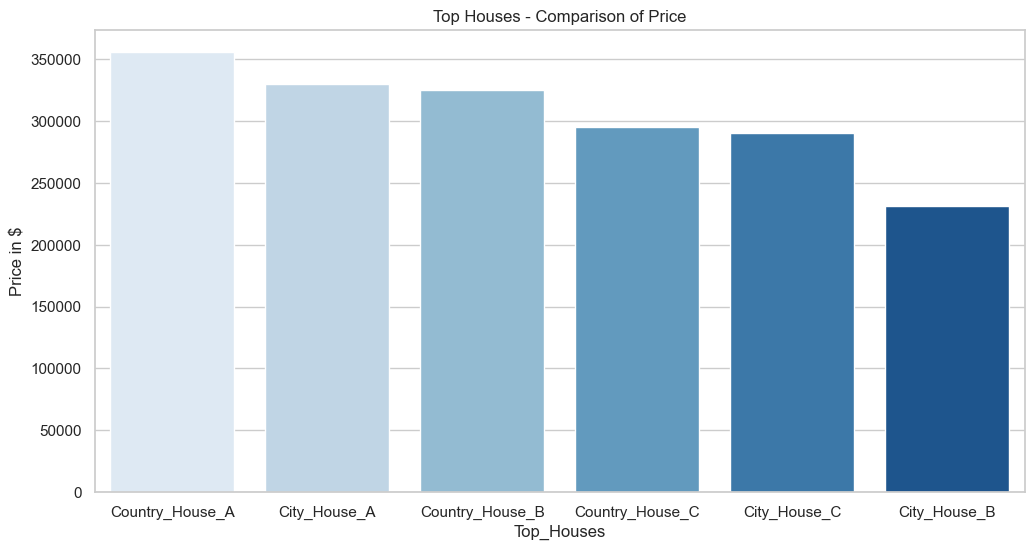

In [63]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

order = top_houses.groupby("Top_3")["price"].median().sort_values(ascending=False).index

# Create a bar chart for 'price'
sns.barplot(x="Top_3", y="price", data=top_houses, palette="Blues", label="Price", order=order)

plt.xlabel("Top_Houses")
plt.ylabel("Price in $")

plt.title("Top Houses - Comparison of Price")
plt.show()

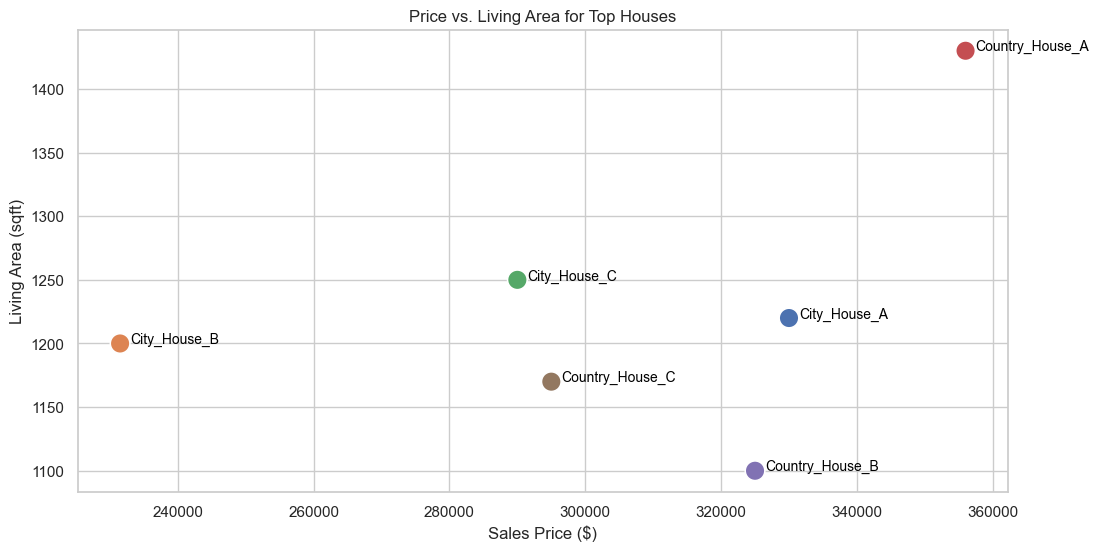

In [64]:
# scatterplot for top houses - size-cost-ratio 1

size_multiplier = 10

plt.figure(figsize=(12, 6))

scatterplot = sns.scatterplot(x='price', y='sqft_living', hue='Top_3', data=top_houses, s=size_multiplier * 20, legend=False)

plt.xlabel('Sales Price ($)')
plt.ylabel('Living Area (sqft)')
plt.title('Price vs. Living Area for Top Houses')
plt.grid(True)

# Add labels next to the dots
for line in range(0, top_houses.shape[0]):
    scatterplot.text(top_houses['price'][line] + 1500, top_houses['sqft_living'][line], top_houses['Top_3'][line], horizontalalignment='left', size='small', color='black', weight='light')

plt.show()


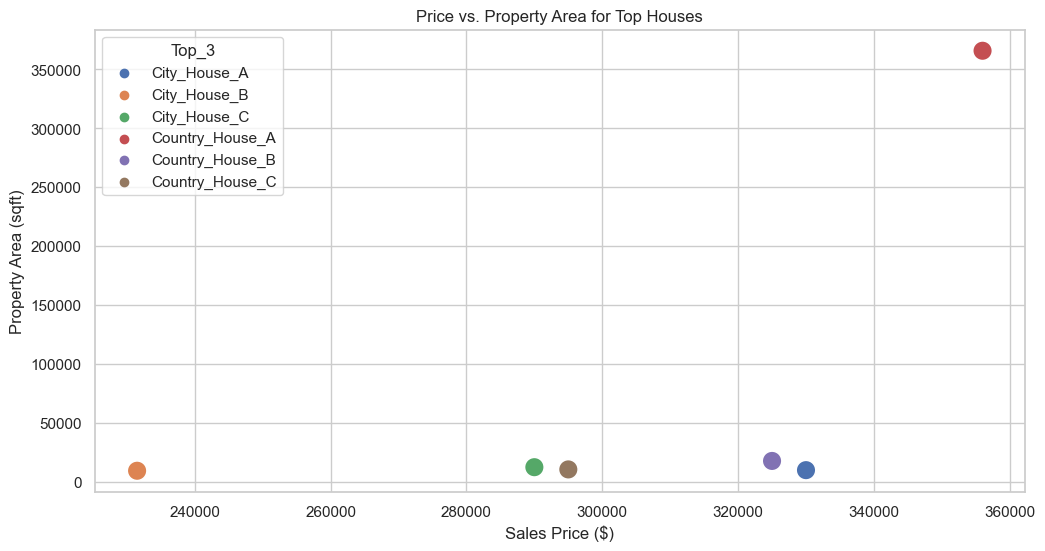

In [65]:
# scatterplot for top houses - size-cost-ratio 2

size_multiplier = 10

plt.figure(figsize=(12, 6))

scatterplot = sns.scatterplot(x='price', y='sqft_lot', hue='Top_3', data=top_houses, s=size_multiplier * 20)

plt.xlabel('Sales Price ($)')
plt.ylabel('Property Area (sqft)')
plt.title('Price vs. Property Area for Top Houses')
plt.grid(True)

plt.show()


In [66]:
top_houses.head(6)

house_id  bedrooms  bathrooms  sqft_living   sqft_lot  floors  condition  \
0  3649100320     2.000      1.000     1220.000  10000.000   1.000          5   
1  6082400260     2.000      1.000     1200.000   9488.000   1.000          5   
2  7809200035     2.000      1.000     1250.000  12507.000   1.000          5   
3   123079023     2.000      1.000     1430.000 365904.000   1.000          3   
4  4047200265     2.000      1.000     1100.000  17817.000   1.000          3   
5  8570900328     2.000      1.000     1170.000  10621.000   1.000          3   

   grade  yr_built  yr_renovated  zipcode    lat     long       date  \
0      7      1950         0.000    98028 47.740 -122.241 2015-04-30   
1      7      1941         0.000    98168 47.483 -122.299 2014-11-12   
2      7      1958         0.000    98056 47.497 -122.176 2015-01-23   
3      7      1991         0.000    98065 47.513 -121.857 2014-11-24   
4      7      1980         0.000    98019 47.773 -121.900 2014-08-11   
5      7      1963         0.000    98045 47.497 -121.780 2014-06-03   

       price  date_year  date_month            Top_3  
0 330000.000       2015           4     City_House_A  
1 231500.000       2014          11     City_House_B  
2 290000.000       2015           1     City_House_C  
3 356000.000       2014          11  Country_House_A  
4 325000.000       2014           8  Country_House_B  
5 295000.000       2014           6  Country_House_C

### FINAL CONCLUSIONS


#### A. 	Insights:

- Older houses tend to be smaller. Newer Houses tend to have better building grades.
- The better rated and the bigger a house, the more expensive it usually is.
- The price range is relatively evenly distributed throughout the zipcodes.
- Country houses tend to be bigger, city houses tend be more more expensive compared to each other.


#### B. 		Recommendations:

- Country House A has the biggest plot, but Country House B is on a lake...
- City House C has the best size-to-cost ratio and is also the newest of the Top 3 city houses.
- The best time to buy a house depends on your individual circumstances and goals.
	
	(The sooner the better though, since prices tend to increase over time.)

---

#### END OF EDA.